<a href="https://colab.research.google.com/github/pathvasariah/LinearRegressionIntro_GoogleColab/blob/main/pratica_regressao_linear_xp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Carregar dataset custo_diaria;
*   Análise dos dados coletados;
*   Tratamento dos dados;
*   Aplicar modelo ML de regressão linear;
*   Avaliar as métricas do modelo criado;




## Importando as bibliotecas

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Coletando os dados

In [ ]:
custo_diaria = pd.read_csv('/content/custo_diário.csv' ,sep = ',')

## Analisando os dados coletados

In [ ]:
# Visualizando arqivos da base de dados;
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [ ]:
# Gerando algumas estatísticas da base de dados;
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,10.000000,10.000000
mean,14.400000,872.200000
std,9.465728,511.984114
min,1.000000,150.000000
25%,7.000000,544.250000
50%,14.000000,797.000000
75%,21.000000,1053.500000
max,30.000000,1850.000000


In [ ]:
# Verificando se existe algum valor nulo ou ausente;
custo_diaria.isna().sum()

qtd_pessoas     0
valor_diaria    0
dtype: int64

In [ ]:
# Verificando as informações da base de dados;
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   10 non-null     int64
 1   valor_diaria  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


## Análise correlação entre as variáveis



*   Correlação positiva: quando duas variáveis que possem correlação crescem ou descrescem juntas, ou seja, possuem uma relação direta.
*   Correlação negativa: quando duas variáveis possem correlação mas quando uma cresce a outra descresce, ou vice-versa.



In [ ]:
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.980798
valor_diaria,0.980798,1.000000


## Análise gráfica da correlação entre as variáveis

<Axes: >

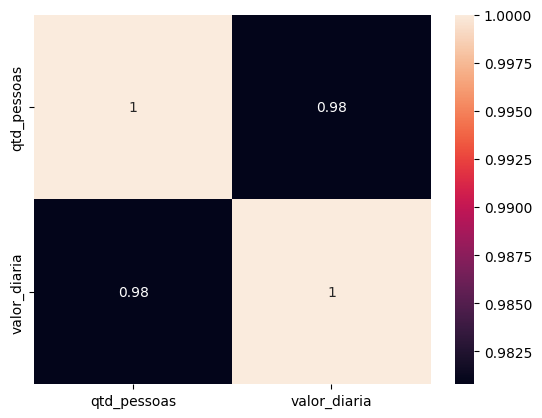

In [ ]:
correlacao = custo_diaria.corr()
sns.heatmap(correlacao, annot=True)

## Tratamento de dados

Nesta etapa, vamos preparar os dados para serem usados no modelo de Regressão Linear. Essa transformação deve ser realizada para que os dados possam ter o formato que o algortimo solicita como entrada.

### Criando variável independente - X

Coletamos todos os registros da primeira coluna e convertemos no formato de array.

In [ ]:
X = custo_diaria.iloc[:,0].values
print(X)

[ 1  4  6 10 13 15 18 22 25 30]


A fnção iloc permite selecionar um conjunto de registros. Os dois pontos ":" significa que selecionamos todos os registros e o zero "0" primeira coluna

Criando variável dependente - Y (O que queremos prever)

In [ ]:
Y = custo_diaria.iloc[:,1].values
print(Y)

[ 150  385  499  680  735  859  989 1075 1500 1850]


### Verificando os tipos das variáveis

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X.shape

(10,)

### Transformando array em matriz

In [ ]:
X = X.reshape(-1,1)

In [ ]:
X.shape

(10, 1)

## Criando modelo de Machine Learn - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
predicao_custo_diaria = LinearRegression()

In [ ]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

### Realizando o treinamento do modelo

In [ ]:
predicao_custo_diaria.fit(X,Y)

LinearRegression()

### Calculando a constante Alfa - Intercept

In [ ]:
predicao_custo_diaria.intercept_

108.2857142857141

### Calculando o coeficiente angular - Coef

In [ ]:
predicao_custo_diaria.coef_

array([53.04960317])

### Realizando a predição dos valores das diárias

Baseado no número de pessoas, vamos estimar/prever o custo do imóvel alugado.

In [ ]:
previsao_valores = predicao_custo_diaria.predict(X)

In [ ]:
X

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30]])

In [ ]:
# Visualização das previsões para cada n° de pessoas.
previsao_valores

array([ 161.33531746,  320.48412698,  426.58333333,  638.78174603,
        797.93055556,  904.0297619 , 1063.17857143, 1275.37698413,
       1434.52579365, 1699.77380952])

## Visalizando no gráfico as disposições dos dados

Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel().

### Gerando visualização gráfica

In [ ]:
# Gráfico 1 - Sem as previsões
grafico = px.scatter(x = X.ravel(), y=Y)
grafico.show()

In [ ]:
# Gráfico 2
grafico = px.scatter(x = X.ravel(), y=Y)
grafico.add_scatter(x=X.ravel(), y=previsao_valores, name = 'Previsões')
grafico.show()

### Calculando o valor da diária através da função predict do modelo

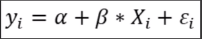



*   *y_i = Previsão do preço da diária.*
*   *α = Constante.*
*   *β_i = Coeficiente de inclinação da reta.*
*   *X_i = Número de pessoas.*
*   *ε_i = Erro.*




In [ ]:
alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 8

alfa + beta * Xi

array([532.68253968])

### Calculando o valor da diária através da função predict do modelo

In [ ]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

array([532.68253968])

## Avaliação do modelo

In [ ]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X,Y)

0.9619651013767775

### Calculando o Mean Absolut Error


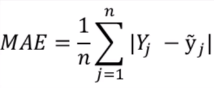

In [ ]:
mean_absolute_error(Y, previsao_valores)

78.7702380952381

### Calculando o Mean Squared Error

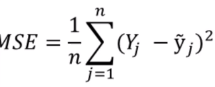

In [ ]:
MSE = mean_squared_error(Y, previsao_valores)
print(MSE)

8973.001587301591


### Calculando o Root Mean Squared Error

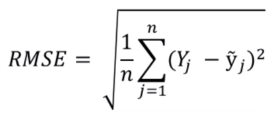

In [ ]:
np.sqrt(MSE)

94.72592880147225